In [1]:
import matplotlib.pylab as plt

from skimage.color import rgb2gray
from skimage.morphology import remove_small_holes, remove_small_objects, erosion, disk
from skimage.measure import label, regionprops
from skimage.draw import circle

import numpy as np

In [2]:
CONST_THRESHOLD = 0.3
CONST_RADIUS_CORRECTION = 5

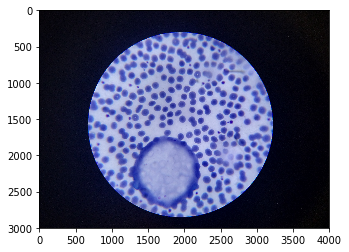

In [3]:
init_image = plt.imread('0005.png')
plt.imshow(init_image)

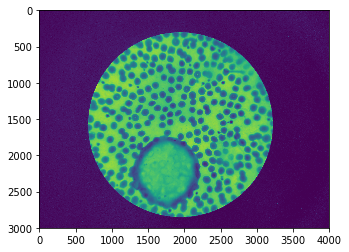

In [4]:
img1 = rgb2gray(init_image)
plt.imshow(img1)

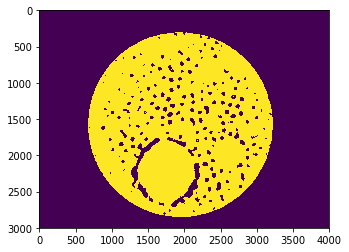

In [5]:
img2 = img1 > CONST_THRESHOLD
plt.imshow(img2)

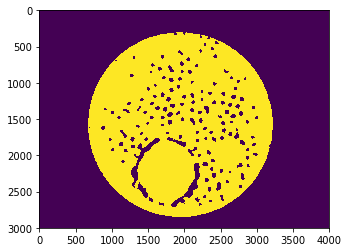

In [6]:
img3_1 = remove_small_holes(img2, 1000)
img3_2 = remove_small_objects(img3_1, 1000)
plt.imshow(img3_2)

In [7]:
reg_prop = regionprops(label(img3_2))
reg_ind = np.argmax(map(lambda x: x.area, reg_prop))
coords = reg_prop[reg_ind].centroid
radius = (reg_prop[reg_ind].major_axis_length + reg_prop[reg_ind].minor_axis_length)/2./2. - CONST_RADIUS_CORRECTION
print(coords, radius)

(1562.1879691067184, 1946.858649403568) 1281.5735449090344


/usr/local/lib/python3.5/dist-packages/skimage/measure/_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
/usr/local/lib/python3.5/dist-packages/skimage/measure/_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


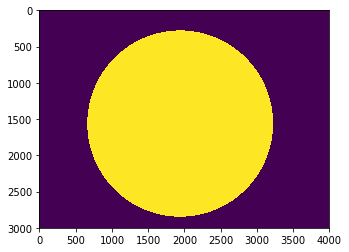

In [8]:
mask = np.zeros(img3_2.shape, dtype=bool)
rr, cc = circle(coords[0], coords[1], radius)
mask[rr, cc] = 1
plt.imshow(mask)

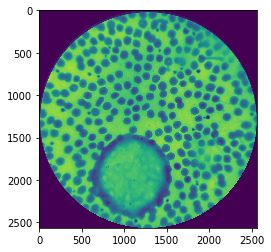

In [9]:
bounds_t = int(coords[0]-radius)
bounds_b = int(coords[0]+radius)+1
bounds_l = int(coords[1]-radius)
bounds_r = int(coords[1]+radius)+1

#img4 = (mask*img1 + ~mask)[bounds_t:bounds_b,bounds_l:bounds_r]
mask2 = mask[bounds_t:bounds_b,bounds_l:bounds_r]
img4 = (mask*img1)[bounds_t:bounds_b,bounds_l:bounds_r]
plt.imshow(img4)

In [10]:
from skimage.filters import threshold_otsu, threshold_adaptive

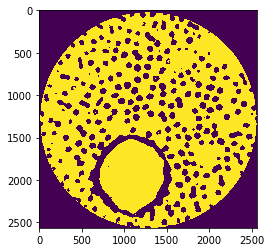

In [11]:
#plt.hist(img4.ravel(), bins=30)
#plt.axvline(x=threshold_otsu(img4))
# SHIT!!!
img5_ = img4 > threshold_otsu(img4)
plt.imshow(img5_)

/usr/local/lib/python3.5/dist-packages/skimage/filters/thresholding.py:229: skimage_deprecation: Function ``threshold_adaptive`` is deprecated and will be removed in version 0.15. Use ``threshold_local`` instead.
  def threshold_adaptive(image, block_size, method='gaussian', offset=0,
/usr/local/lib/python3.5/dist-packages/skimage/filters/thresholding.py:231: UserWarning: The return value of `threshold_local` is a threshold image, while `threshold_adaptive` returned the *thresholded* image.
  warn('The return value of `threshold_local` is a threshold image, while '


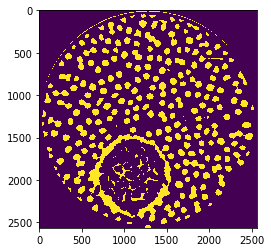

In [12]:
block_size = 101
img5 = threshold_adaptive(img4, block_size)
img6 = ~mask2|img5
img7 = remove_small_holes(img6,2000)
img8 = remove_small_objects(img7,2000)
img9 = erosion(~img8, disk(8))
plt.imshow(img9)

In [13]:
areas = list(map(lambda x: x.area, regionprops(label(img9))))
areas

[15609,
 2028,
 2065,
 1079,
 2374,
 3363,
 3,
 1118,
 1,
 6062,
 11934,
 8272,
 5170,
 2881,
 3360,
 2876,
 4634,
 2093,
 5237,
 9438,
 14484,
 819,
 4019,
 1855,
 3296,
 5830,
 4950,
 4423,
 3718,
 7594,
 1,
 3937,
 1,
 4142,
 5508,
 25,
 3775,
 1555,
 3,
 3408,
 3,
 15,
 3188,
 8626,
 2947,
 4110,
 4219,
 6,
 4203,
 1,
 1,
 8852,
 3205,
 2275,
 5418,
 4990,
 4382,
 3861,
 3953,
 4329,
 9052,
 2524,
 2385,
 7288,
 5287,
 4388,
 5333,
 3322,
 4818,
 3846,
 4681,
 3824,
 4781,
 4814,
 4088,
 4341,
 5085,
 434,
 2928,
 4649,
 7010,
 3971,
 4485,
 9200,
 4770,
 4701,
 3534,
 4712,
 2702,
 8637,
 4246,
 5432,
 4309,
 4556,
 1,
 2,
 8414,
 3269,
 93,
 4731,
 10600,
 2591,
 5708,
 5111,
 6210,
 5031,
 3795,
 1,
 4470,
 1,
 4627,
 1,
 5246,
 4211,
 1,
 2,
 9676,
 4468,
 1,
 4205,
 2,
 1,
 5821,
 4390,
 3677,
 1,
 4849,
 3,
 3639,
 1,
 3,
 3624,
 4116,
 5320,
 6,
 7407,
 4511,
 4457,
 8380,
 6158,
 3166,
 8659,
 3703,
 4498,
 5606,
 3575,
 3845,
 3865,
 1547,
 3911,
 4058,
 4930,
 4447,
 5316

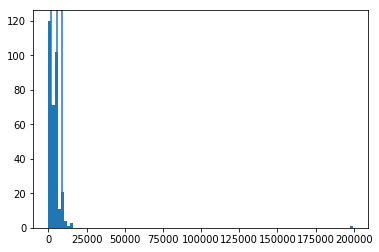

In [14]:
areas = list(map(lambda x: x.area, regionprops(label(img9))))
plt.hist(areas, bins=100)
plt.axvline(x=(1-0.5)*np.median(areas))
plt.axvline(x=1.5*np.median(areas))
plt.axvline(x=2.5*np.median(areas))

In [16]:
median = np.median(areas)
count_ = 0
for area in areas:
    if (1-0.9)*median < area <= (1+0.4)*median:
        count_+=1
    elif (2-0.6)*median < area <= (2+0.4)*median:
        count_+=2
    elif (3-0.6)*median < area <= (3+0.4)*median:
        count_+=3
    elif (4-0.6)*median < area:
        count_+=3
print(count_)

326
